In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
## Decision tree
from sklearn import tree
from sklearn import metrics
## Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
## kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import NearestNeighbors

# Visualizing Decision Trees
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

%matplotlib inline

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# SVM
from sklearn import svm

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# plot ROC Curve
from sklearn.metrics import roc_curve

# compute ROC AUC
from sklearn.metrics import roc_auc_score

# calculate cross-validated ROC AUC 
from sklearn.model_selection import cross_val_score

In [ ]:
gender = pd.read_csv("../data/raw/titanic/gender_submission.csv")
gender.info()
gender.head()

In [2]:
train = pd.read_csv("../data/raw/titanic/train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv("../data/raw/titanic/test.csv") # dataset used by Kaggle to evaluate our model performance egal to everyone
test.info()
test.head()

In [ ]:
train["Sex"].unique()

In [ ]:
train["Pclass"].unique()

In [ ]:
train["Embarked"].unique()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", title = "Proportions of men and women who survived and died")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Sex", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of men and women who survived and died according to their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Survived", barmode = "group", facet_col = "Pclass",
                  title = "Proportions of people who survived and died according to the embarked place and their social class")
fig.show()

In [ ]:
fig = px.histogram(train, x = "Embarked", color = "Sex", barmode = "group", facet_col = "Pclass",
                  title="Repartition of men and women in different embarked places according to their social class")
fig.show()

In [3]:
# Separating the features and the target (Survived)
X = train.drop(columns = ["Survived"])
X.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
y = train["Survived"]
y.info()
y.head()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
# Splitting the train dataset, to evaluate my model's performance
# Good practice: splitting the earlier as possible, to avoid that data from dataset could be found in the test dataset
# ex: filling missing data with mean of all data of the whole "Age" column: calculate the mean in the train dataset and report in
# in the test one
# ex: Embarked: missing values at 0 => to verify the impact on the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42
)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
y_train

In [ ]:
y_test

In [6]:
def apply_male_int(sex):
    if sex == "male":
        sex = 1
    else:
        sex = 0
    return sex

In [7]:
X_train["male"] = X_train["Sex"].apply(apply_male_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 60.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0


In [8]:
def apply_Pclass_int(Pclass):
    if Pclass != 1:
        Pclass = 0
    return Pclass

In [9]:
X_train["Pclass1"] = X_train["Pclass"].apply(apply_Pclass_int)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 65.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0


In [10]:
def apply_Pclass(Pclass):
    if Pclass != 2:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [11]:
X_train["Pclass2"] = X_train["Pclass"].apply(apply_Pclass)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 69.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0


In [12]:
def apply_Pclass_last(Pclass):
    if Pclass != 3:
        Pclass = 0
    else:
        Pclass = 1
    return Pclass

In [13]:
X_train["Pclass3"] = X_train["Pclass"].apply(apply_Pclass_last)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          478 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.0,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,0,0,0,1


In [14]:
# replacing NaN values by the mean of the column in Age one
X_train["Age"].unique()

array([54.  ,   nan, 25.  , 26.  , 22.  , 31.  , 49.  , 19.  , 24.  ,
       16.  , 39.  , 47.  , 60.  , 27.  , 38.  , 44.  , 21.  , 45.  ,
        8.  , 32.  , 50.  , 23.  , 15.  , 28.  , 41.  , 33.  , 52.  ,
       20.  ,  9.  , 43.  , 17.  , 37.  , 62.  , 46.  , 29.  , 56.  ,
       59.  , 58.  ,  3.  , 30.  , 28.5 , 36.  ,  0.75, 35.  , 55.  ,
       51.  ,  2.  , 14.  , 45.5 ,  4.  , 40.5 , 40.  , 18.  , 12.  ,
       11.  ,  1.  ,  7.  , 70.5 , 34.  , 70.  , 42.  , 48.  , 80.  ,
       55.5 , 14.5 , 10.  , 53.  , 32.5 , 74.  , 64.  ,  6.  ,  5.  ,
       24.5 ,  0.42, 61.  ,  0.67, 13.  ,  0.83])

In [15]:
mean_age = X_train["Age"].mean()
mean_age

29.525983263598327

In [16]:
X_train["Age"].fillna(mean_age, inplace = True)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 74.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1


In [17]:
def apply_embarked_S(embarked):
    if embarked != "S":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [18]:
X_train["Embarked_S"] = X_train["Embarked"].apply(apply_embarked_S)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 79.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1


In [19]:
def apply_embarked_Q(embarked):
    if embarked != "Q":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [20]:
X_train["Embarked_Q"] = X_train["Embarked"].apply(apply_embarked_Q)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 83.8+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0


In [21]:
def apply_embarked_C(embarked):
    if embarked != "C":
        embarked = 0
    else:
        embarked = 1
    return embarked

In [22]:
X_train["Embarked_C"] = X_train["Embarked"].apply(apply_embarked_C)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Name         596 non-null    object 
 3   Sex          596 non-null    object 
 4   Age          596 non-null    float64
 5   SibSp        596 non-null    int64  
 6   Parch        596 non-null    int64  
 7   Ticket       596 non-null    object 
 8   Fare         596 non-null    float64
 9   Cabin        134 non-null    object 
 10  Embarked     595 non-null    object 
 11  male         596 non-null    int64  
 12  Pclass1      596 non-null    int64  
 13  Pclass2      596 non-null    int64  
 14  Pclass3      596 non-null    int64  
 15  Embarked_S   596 non-null    int64  
 16  Embarked_Q   596 non-null    int64  
 17  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 88.5+

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S,1,1,0,0,1,0,0
718,719,3,"McEvoy, Mr. Michael",male,29.525983,0,0,36568,15.5000,NaN,Q,1,0,0,1,0,1,0
685,686,2,"Laroche, Mr. Joseph Philippe Lemercier",male,25.000000,1,2,SC/Paris 2123,41.5792,NaN,C,1,0,1,0,0,0,1
73,74,3,"Chronopoulos, Mr. Apostolos",male,26.000000,1,0,2680,14.4542,NaN,C,1,0,0,1,0,0,1
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,NaN,S,0,0,0,1,1,0,0


In [23]:
X_train = X_train.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  596 non-null    int64  
 1   Pclass       596 non-null    int64  
 2   Age          596 non-null    float64
 3   SibSp        596 non-null    int64  
 4   Parch        596 non-null    int64  
 5   Fare         596 non-null    float64
 6   male         596 non-null    int64  
 7   Pclass1      596 non-null    int64  
 8   Pclass2      596 non-null    int64  
 9   Pclass3      596 non-null    int64  
 10  Embarked_S   596 non-null    int64  
 11  Embarked_Q   596 non-null    int64  
 12  Embarked_C   596 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 65.2 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
6,7,1,54.000000,0,0,51.8625,1,1,0,0,1,0,0
718,719,3,29.525983,0,0,15.5000,1,0,0,1,0,1,0
685,686,2,25.000000,1,2,41.5792,1,0,1,0,0,0,1
73,74,3,26.000000,1,0,14.4542,1,0,0,1,0,0,1
882,883,3,22.000000,0,0,10.5167,0,0,0,1,1,0,0


In [24]:
# same transformations on the X_test dataset
X_test["male"] = X_test["Sex"].apply(apply_male_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 30.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0


In [25]:
X_test["Pclass1"] = X_test["Pclass"].apply(apply_Pclass_int)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 32.3+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0


In [26]:
X_test["Pclass2"] = X_test["Pclass"].apply(apply_Pclass)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 34.6+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0


In [27]:
X_test["Pclass3"] = X_test["Pclass"].apply(apply_Pclass_last)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          236 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,0,0,0,1


In [28]:
X_test["Age"].fillna(mean_age, inplace = True)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 36.9+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1


In [29]:
X_test["Embarked_S"] = X_test["Embarked"].apply(apply_embarked_S)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 39.2+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0


In [30]:
X_test["Embarked_Q"] = X_test["Embarked"].apply(apply_embarked_Q)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
dtypes: float64(2), int64(10), object(5)
memory usage: 41.5+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0


In [31]:
X_test["Embarked_C"] = X_test["Embarked"].apply(apply_embarked_C)
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Name         295 non-null    object 
 3   Sex          295 non-null    object 
 4   Age          295 non-null    float64
 5   SibSp        295 non-null    int64  
 6   Parch        295 non-null    int64  
 7   Ticket       295 non-null    object 
 8   Fare         295 non-null    float64
 9   Cabin        70 non-null     object 
 10  Embarked     294 non-null    object 
 11  male         295 non-null    int64  
 12  Pclass1      295 non-null    int64  
 13  Pclass2      295 non-null    int64  
 14  Pclass3      295 non-null    int64  
 15  Embarked_S   295 non-null    int64  
 16  Embarked_Q   295 non-null    int64  
 17  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11), object(5)
memory usage: 43.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",male,29.525983,1,1,2661,15.2458,NaN,C,1,0,0,1,0,0,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.000000,0,0,C.A. 18723,10.5000,NaN,S,1,0,1,0,1,0,0
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.000000,0,0,SOTON/O2 3101287,7.9250,NaN,S,1,0,0,1,1,0,0
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.000000,0,1,248727,33.0000,NaN,S,0,0,1,0,1,0,0
39,40,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,0,0,0,1,0,0,1


In [32]:
X_test = X_test.drop(columns = ["Name", "Sex", "Ticket", "Cabin", "Embarked"])
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 709 to 173
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  295 non-null    int64  
 1   Pclass       295 non-null    int64  
 2   Age          295 non-null    float64
 3   SibSp        295 non-null    int64  
 4   Parch        295 non-null    int64  
 5   Fare         295 non-null    float64
 6   male         295 non-null    int64  
 7   Pclass1      295 non-null    int64  
 8   Pclass2      295 non-null    int64  
 9   Pclass3      295 non-null    int64  
 10  Embarked_S   295 non-null    int64  
 11  Embarked_Q   295 non-null    int64  
 12  Embarked_C   295 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 32.3 KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Pclass1,Pclass2,Pclass3,Embarked_S,Embarked_Q,Embarked_C
709,710,3,29.525983,1,1,15.2458,1,0,0,1,0,0,1
439,440,2,31.000000,0,0,10.5000,1,0,1,0,1,0,0
840,841,3,20.000000,0,0,7.9250,1,0,0,1,1,0,0
720,721,2,6.000000,0,1,33.0000,0,0,1,0,1,0,0
39,40,3,14.000000,1,0,11.2417,0,0,0,1,0,0,1


In [ ]:
# Classification pb:

# - logistic regression
# - decision tree classifier
# - random forest
# - support vector machine
# - K Nearest Neighbour
# - Naive Bayes

# 1) Start by decision tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
# plotting the tree
tree.plot_tree(clf)

In [ ]:
# Predicting the results on the test dataset
y_pred = clf.predict(X_test)

In [ ]:
# Evaluating the model

## Model accuracy: 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

In [ ]:
## Model precision, recall and f1-score + cross val score

### Precision: 
print(classification_report(y_test, y_pred))
#cross_val_score(clf, X_train, y_train, cv = 10)

Interpretation model evaluation (decision tree):

- Accuracy: How often is the classifier correct? Measures the overall correctness of predictions.
  Question: Did we solve the problem correctly?
- Precision: Measures the proportion of correctly predicted positive instances. Indicates at which point we can detect a class / at which point we made a mistake in predictions?
  Precision = TP/(TP+FP), refers to specificity - only on positive samples. We calculate the ratio of good positive predictions over the number of total samples predicted to be positive (True: is it well predicted? / False: did the model predict it badly?).
  Question: Among all passengers predicted as survivors, how many really survived?
- Recall: Looks like precision, but at which point we can detect all examples of a class => Could we detect everything in the database?
  It's the ratio of good positive predictions over the total number of positive observations in reality.
  Question: Among all passengers who really survived, how many survivors were predicted?
  Refers to sensitivity => At which point did we detect all of them? 
- F1-score: F1-score (F-measure) = (2*(recall*precision)) / (recall + prediction).
  It is the weighted average of precision and recall. The aim is to have a single score representative of both. 

1st tests using default parameters:
- accuracy = 0.7593220338983051 (first run), 0.7661016949152543 (2nd run) => good accuracy
- precision(0) = 81% => good precision (minimum 70-80% to be good)
- precision(1) = 70%
- recall(0) = 0.79 => good value, low number of false negatives.
- recall(1) = 0.73
- f1-score(0) = 0.80 => good value, good overall performance of the classification model.
- f1-score(1) = 0.72

In [ ]:
# displaying the decision tree
dot_data = StringIO()
tree.export_graphviz(clf, out_file = dot_data,
                    filled = True, rounded = True,
                    special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('../reports/figures/titanic_decision_tree_colored.png')
Image(graph.create_png())

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Decision Tree Classifier Model')
plt.savefig('../reports/figures/confusion_matrix_DTC.png')

In [ ]:
# 2) Carry on with random forest

#clf2 = RandomForestClassifier(max_depth = 2, random_state = 0)
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)

In [ ]:
y_pred = clf2.predict(X_test)
y_pred
#print(clf2.predict(X_test))

In [ ]:
# Measuring the metrics for random forest classifier

### View accuracy score
accuracy_score(y_test, y_pred) # => 0.7728813559322034 ; 0.8169491525423729 with default parameters

In [ ]:
### View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

Interpretation of the results for Random Forest Classifier:

1st test using default parameters:

- Accuracy = 0.8169491525423729 => good accuracy
- Precision(0) = 0.80
- Precision(1) = 0.82 => good precision: among all passengers who are predicted as survivors, 80-82% really survived.  
- Recall(0) = 0.90 => good value: among all passengers who really died, we predicted 90% dead people. 
- Recall(1) = 0.67 => low value: among all passengers who really survived, we predicted 67% survivors.
- F1-score(0) = 0.85 
- F1-score(1) = 0.74 => good values, good overall performance of the model

In [ ]:
### Confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)
## TP FP
## FN TN

In [ ]:
#### Plotting the confusion matrix
#### Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.savefig('../reports/figures/confusion_matrix_RFC_with_default_parameters.png')
#plt.show()

In [33]:
# 3) kNN
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred = neigh.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0])

In [35]:
y_pred_proba = neigh.predict_proba(X_test)
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.

In [37]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[138,  37],
       [ 71,  49]])

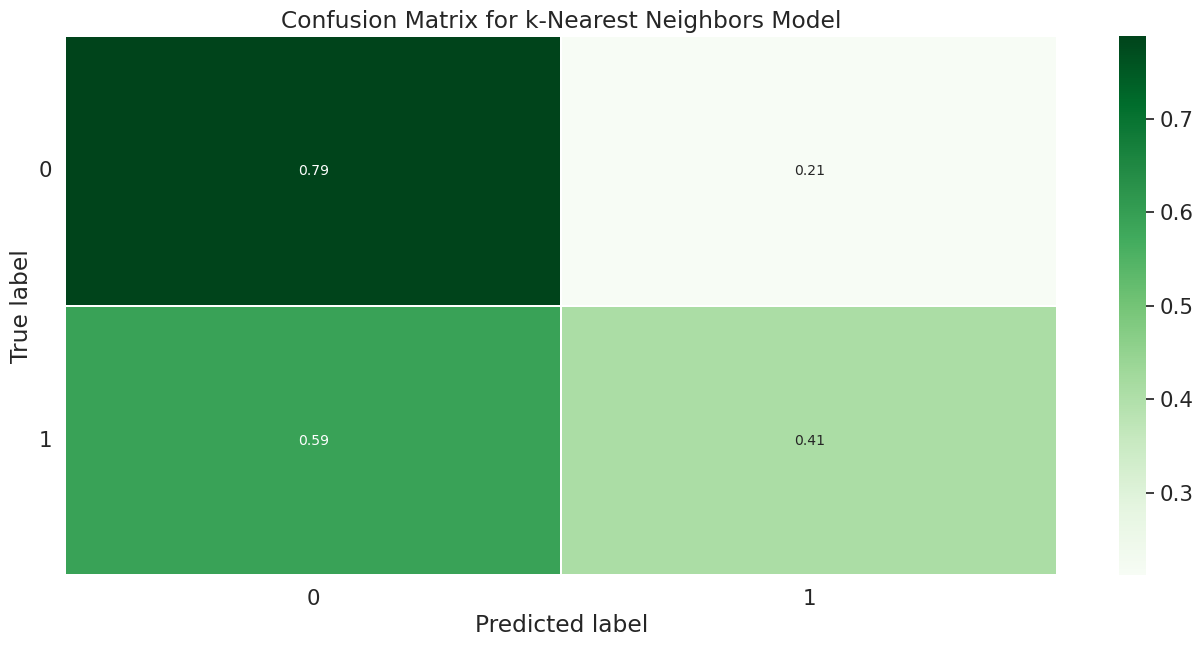

In [38]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for k-Nearest Neighbors Model')
plt.savefig('../reports/figures/confusion_matrix_KNN.png')

In [ ]:
neigh2 = NearestNeighbors(n_neighbors=1)
neigh2.fit(X_train, y_train)

In [ ]:
y_pred = neigh2.kneighbors(X_test)
y_pred

In [ ]:
neigh2.kneighbors(X_test, return_distance=False)

In [ ]:
A = neigh2.kneighbors_graph(X_test)
A.toarray()

In [ ]:
clf3 = Pipeline(steps = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors = 11))])

In [ ]:
# See how to proceed here

# _, axs = plt.subplots(ncols=2, figsize=(12, 5))

# for ax, weights in zip(axs, ("uniform", "distance")):
#     clf3.set_params(knn__weights=weights).fit(X_train, y_train)
#     disp = DecisionBoundaryDisplay.from_estimator(
#         clf3,
#         X_test,
#         response_method="predict",
#         plot_method="pcolormesh",
#         xlabel=X.feature_names[0],
#         ylabel=X.feature_names[1],
#         shading="auto",
#         alpha=0.5,
#         ax=ax,
#     )
#     scatter = disp.ax_.scatter(X_train, c=y, edgecolors="k")
#     disp.ax_.legend(
#         scatter.legend_elements()[0],
#         X_train.target_names,
#         loc="lower left",
#         title="Classes",
#     )
#     _ = disp.ax_.set_title(
#         f"3-Class classification\n(k={clf3[-1].n_neighbors}, weights={weights!r})"
#     )

# plt.show()

In [41]:
# 4) Logistic regression

clf4 = LogisticRegression().fit(X_train, y_train)
y_pred = clf4.predict(X_test)
y_pred

/home/caujoulat/miniforge3/envs/EnvML/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0])

In [42]:
clf4.predict_proba(X_test)

array([[0.82973713, 0.17026287],
       [0.72432402, 0.27567598],
       [0.86594888, 0.13405112],
       [0.12048396, 0.87951604],
       [0.27362763, 0.72637237],
       [0.15837497, 0.84162503],
       [0.36043584, 0.63956416],
       [0.90276949, 0.09723051],
       [0.32237394, 0.67762606],
       [0.28179261, 0.71820739],
       [0.79593391, 0.20406609],
       [0.90892277, 0.09107723],
       [0.54568518, 0.45431482],
       [0.82211003, 0.17788997],
       [0.7439056 , 0.2560944 ],
       [0.17005938, 0.82994062],
       [0.77376439, 0.22623561],
       [0.32529667, 0.67470333],
       [0.66552055, 0.33447945],
       [0.80175812, 0.19824188],
       [0.8973722 , 0.1026278 ],
       [0.77580909, 0.22419091],
       [0.45455036, 0.54544964],
       [0.87272421, 0.12727579],
       [0.89053914, 0.10946086],
       [0.91366735, 0.08633265],
       [0.67946666, 0.32053334],
       [0.69928139, 0.30071861],
       [0.93080188, 0.06919812],
       [0.44395124, 0.55604876],
       [0.

In [43]:
clf4.score(X_test, y_test)

0.8033898305084746

In [44]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[155,  20],
       [ 38,  82]])

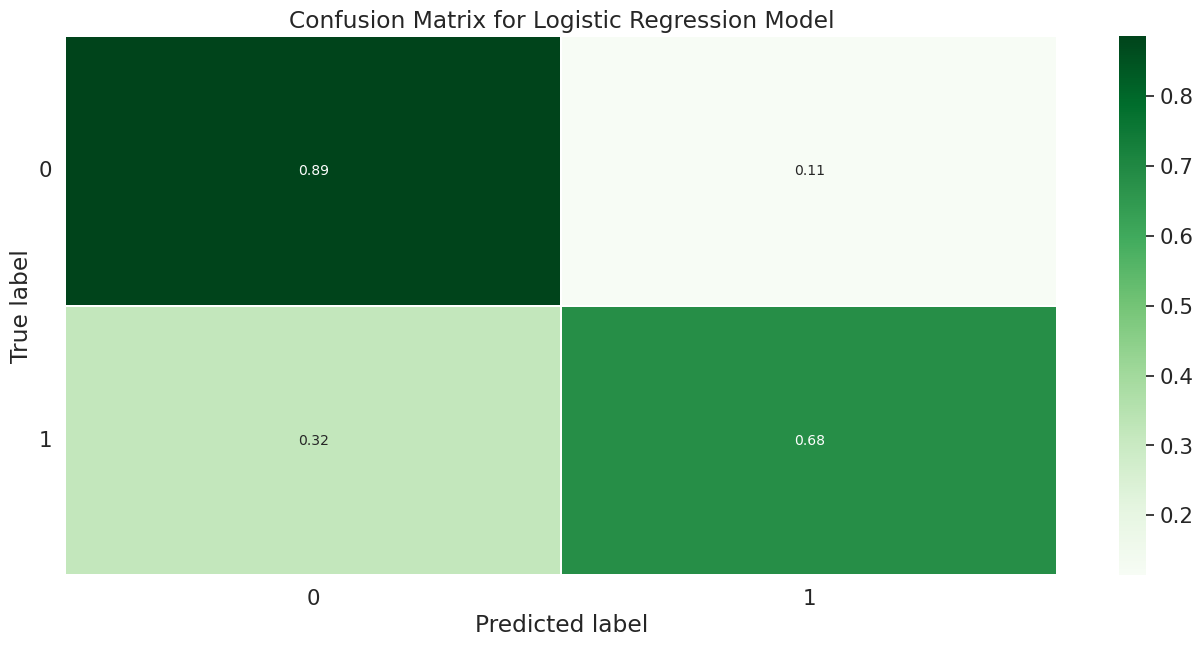

In [45]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis = 1)[:, np.newaxis]

#### Building the plot
plt.figure(figsize = (16,7))
sns.set(font_scale = 1.4)
sns.heatmap(matrix, annot = True, annot_kws = {'size':10},
           cmap = plt.cm.Greens, linewidths = 0.2)

#### Adding labels to the plot
class_names = np.array([0, 1])
tick_marks = np.arange(len(class_names)) + 0.5
tick_marks2 = tick_marks
plt.xticks(tick_marks, class_names, rotation = 0)
plt.yticks(tick_marks2, class_names, rotation = 0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.savefig('../reports/figures/confusion_matrix_logistic_regression.png')

In [ ]:
# 5) SVM classification
clf5 = svm.SVC()
clf5.fit(X_train, y_train)

In [ ]:
clf5.predict(X_test)

In [ ]:
clf5.support_vectors_

In [ ]:
# 6) Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
y_pred

In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
...       % (X_test.shape[0], (y_test != y_pred).sum()))

In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
# True Positive rate

true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

In [ ]:
# False Positive rate

false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [ ]:
# Specificity

specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of survived/dead persons')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of survived/dead persons')
plt.ylabel('Frequency')

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = '...')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting if a person survived or not')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
# ROC and AUC metrics
ROC_AUC = roc_auc_score(y_test, y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

In [ ]:
Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

In [ ]:
scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

In [ ]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))